#### Analysis of a single stock

Goal: Take 1 stock and run a trendline through 1 year. Assess the theoretical performance of adjusting weekly contributions as compared to contributing a consistent amount every week.

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import seaborn
import numpy as np

In [2]:
# AAPL, AMD, AMZN, CRM, GOOG, MSFT, NVDA, TSLA

stock = yf.Ticker("qqq")

In [3]:
# pull data

# Arguments     Scenarios                                                                             Example value

# period        date period to download                                     1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
# interval      data interval. If it’s intraday data, the interval needs to be set within 60 days 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
# start         If period is not set- Download start date string (YYYY-MM-DD) or datetime             2020-03-18
# end           If period is not set - Download end date string (YYYY-MM-DD) or datetime              2020-03-19
# prepost       Boolean value to include Pre and Post market data                                     Default is False
# auto_adjust   Boolean value to adjust all OHLC                                                      Default is True
# actions       Boolean value download stock dividends and stock splits events                        Default is True

df = stock.history(period="1y")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-08-28,291.095327,291.941743,289.701246,291.294495,28021000,0.0,0
2020-08-31,291.832199,295.496649,291.384088,293.634552,36321000,0.0,0
2020-09-01,296.363016,298.772809,294.540758,298.653320,36216200,0.0,0
2020-09-02,301.999055,302.218127,295.636060,301.481262,50836800,0.0,0
2020-09-03,296.840958,297.358751,283.208777,286.196106,110083300,0.0,0
...,...,...,...,...,...,...,...
2021-08-23,368.799988,373.940002,368.790009,373.230011,34034700,0.0,0
2021-08-24,373.839996,374.989990,373.359985,374.369995,21732900,0.0,0
2021-08-25,374.630005,375.390015,373.859985,374.799988,20441900,0.0,0


In [4]:
# add index to df

df = pd.DataFrame(df['Close'])
add = np.arange(1,len(df)+1)

df['Index'] = add

df

,Close,Index
Date,,
2020-08-28,291.294495,1
2020-08-31,293.634552,2
2020-09-01,298.653320,3
2020-09-02,301.481262,4
2020-09-03,286.196106,5
...,...,...
2021-08-23,373.230011,248
2021-08-24,374.369995,249
2021-08-25,374.799988,250


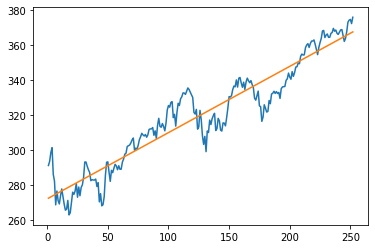

In [5]:
# plot data with a trendline

x = df['Index']
y = df['Close']

plt.plot(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)


In [6]:
# create pred list w/ index

nlist = []

for i in range(1,len(df)+1):
    d = m*i+b
    nlist.append(d)
    
pred = pd.DataFrame(nlist, columns = ['Pred'])

add = np.arange(1,len(df)+1)

pred['Index'] = add
pred

,Pred,Index
0,272.594220,1
1,272.972948,2
2,273.351675,3
3,273.730403,4
4,274.109130,5
...,...,...
247,366.139898,248
248,366.518625,249
249,366.897353,250
250,367.276080,251


In [7]:
# create pred/close list w/ index

nlist = []
ylist = []

for i in range(1,len(df)+1):
    d = (pred['Pred'].iloc[i-1])/(df['Close'].iloc[i-1])
    nlist.append(d)
    
pred_calc = pd.DataFrame(nlist, columns = ['Pred/Close'])
pred_calc

add = np.arange(1,len(df)+1)

pred_calc['Index'] = add
pred_calc

,Pred/Close,Index
0,0.935803,1
1,0.929635,2
2,0.915281,3
3,0.907952,4
4,0.957767,5
...,...,...
247,0.981003,248
248,0.979028,249
249,0.978915,250
250,0.986188,251


In [8]:
# merge close, pred, and pred/close on index

df = pd.merge(left=df, right=pred, left_on='Index', right_on='Index')
df = pd.merge(left=df, right=pred_calc, left_on='Index', right_on='Index')

df.shape
df

,Close,Index,Pred,Pred/Close
0,291.294495,1,272.594220,0.935803
1,293.634552,2,272.972948,0.929635
2,298.653320,3,273.351675,0.915281
3,301.481262,4,273.730403,0.907952
4,286.196106,5,274.109130,0.957767
...,...,...,...,...
247,373.230011,248,366.139898,0.981003
248,374.369995,249,366.518625,0.979028
249,374.799988,250,366.897353,0.978915
250,372.420013,251,367.276080,0.986188


In [9]:
# Is the stock currently higher than the pedicted?
# >1 = prediction is higher
# <1 = stock is higher

df['Pred/Close'].iloc[len(df)-1]

0.9777013057944235